In [1]:
from Pipeline import BLEPipeline, WifiPipeline

# General data processing
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# ML libraries
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score

# System libraries
from itertools import izip, combinations
import random, time

# Warning filtering
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Create dataset

In [2]:
time_start = time.time()

In [3]:
w = WifiPipeline()

In [4]:
# w.extract_packet_features(create_master=True)

In [5]:
df = w.make_dataframe()

Router     101880
Mini        75782
Dropcam     45912
Kasa        17156
Netcam2      3056
Netcam3      2961
Netcam1      2314
Switch2      2204
Switch1      1963
Switch3      1955
Insight      1738
Switch4      1504
Lifx2         545
Lifx1         495
TpPlug        366
TpBulb        191
Name: Name, dtype: int64


## Resample

### Downsampling

In [14]:
# Take out packets from router
df = df[df["DeviceType"]!="router"]

df_train = df[df['Set']=='train']

# List variables that do not work with resampling methods
dataframe_vars = {'Name', 'SourceAddr', 'Set', 'SubtypeNum'}
onehotEncoded_vars = {'Belkin', 'Data', 'Dropcam', 
                      'Lifi', 'Netgear', 'QoS_Data', 'QoS_Null', 'Tp-link'}
response_vars = {"DeviceType","bulb","camera","router","plug"}

# Prep X, y
y = df_train["DeviceType"]
col_drop = response_vars | dataframe_vars | set(['Subtype', 'Vendor'])
X = df_train.drop(col_drop, axis=1)

### Create trial dataframes

In [15]:
df_trials = []

for i in range(0,10):
    df_downsampled = w.downsample(X, y, df[df["Set"]=="test"])
    df_trials.append(df_downsampled)

In [16]:
# Wifi: Define which features to use
features_list = [
        # Packet info
        "PacketLength", "Time",
        
        # Vendor 
         "Belkin", "Dropcam", "Lifi", "Netgear", "Tp-link",
    
        # 802.11 Data subtype
        "Data", "QoS_Data", "QoS_Null",

        # Associated Packets
        "Assoc_Packets"]

# Define what the response classes are
y_list = ["camera", "bulb", "plug"]

# Run trials

In [30]:
df_results = []
for i, trial in enumerate(df_trials):
    print "Trial", i
    result = w.one_vs_all_classify(df_downsampled, features_list, y_list)
    df_results.append(result)

Trial 0
Device Type: camera
RF


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  17636    392  2023  2481  0.199893   0.863557  0.123329  0.215833
rest      392  17636  2481  2023  0.199893   0.102905  0.837681  0.183293
---------------------------------------------------------
KNN


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  11507    778  1637  8610  0.454775   0.917128  0.427996  0.583630
rest      778  11507  8610  1637  0.454775   0.124544  0.677847  0.210425
---------------------------------------------------------
LDA


Metrics
           FN     FP    TN    TP  Accuracy  Precision   Recall        F1
camera  18983    103  2312  1134  0.152938   0.916734  0.05637  0.106210
rest      103  18983  1134  2312  0.152938   0.108570  0.95735  0.195023
---------------------------------------------------------
Total time (classifiers): 0.298735141754

Device Type: bulb
RF


Metrics
      FN  FP     TN  

Device Type: camera
RF


Metrics
          FN    FP     TN     TP  Accuracy  Precision    Recall        F1
camera  6624   300   2115  13493  0.692704   0.978250  0.670726  0.795812
rest     300  6624  13493   2115  0.692704   0.242019  0.875776  0.379236
---------------------------------------------------------
KNN


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  11507    778  1637  8610  0.454775   0.917128  0.427996  0.583630
rest      778  11507  8610  1637  0.454775   0.124544  0.677847  0.210425
---------------------------------------------------------
LDA


Metrics
           FN     FP    TN    TP  Accuracy  Precision   Recall        F1
camera  18983    103  2312  1134  0.152938   0.916734  0.05637  0.106210
rest      103  18983  1134  2312  0.152938   0.108570  0.95735  0.195023
---------------------------------------------------------
Total time (classifiers): 0.290246009827

Device Type: bulb
RF


Metrics
      FN  FP     TN     TP  A

Device Type: camera
RF


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  17747    343  2072  2370  0.197142   0.873572  0.117811  0.207622
rest      343  17747  2370  2072  0.197142   0.104546  0.857971  0.186381
---------------------------------------------------------
KNN


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  11507    778  1637  8610  0.454775   0.917128  0.427996  0.583630
rest      778  11507  8610  1637  0.454775   0.124544  0.677847  0.210425
---------------------------------------------------------
LDA


Metrics
           FN     FP    TN    TP  Accuracy  Precision   Recall        F1
camera  18983    103  2312  1134  0.152938   0.916734  0.05637  0.106210
rest      103  18983  1134  2312  0.152938   0.108570  0.95735  0.195023
---------------------------------------------------------
Total time (classifiers): 0.345033168793

Device Type: bulb
RF


Metrics
       FN   FP     TN     TP 

Device Type: camera
RF


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  17639    330  2085  2478  0.202512   0.882479  0.123179  0.216183
rest      330  17639  2478  2085  0.202512   0.105709  0.863354  0.188355
---------------------------------------------------------
KNN


Metrics
           FN     FP    TN    TP  Accuracy  Precision    Recall        F1
camera  11507    778  1637  8610  0.454775   0.917128  0.427996  0.583630
rest      778  11507  8610  1637  0.454775   0.124544  0.677847  0.210425
---------------------------------------------------------
LDA


Metrics
           FN     FP    TN    TP  Accuracy  Precision   Recall        F1
camera  18983    103  2312  1134  0.152938   0.916734  0.05637  0.106210
rest      103  18983  1134  2312  0.152938   0.108570  0.95735  0.195023
---------------------------------------------------------
Total time (classifiers): 0.289835929871

Device Type: bulb
RF


Metrics
        FN    FP     TN     T

## Reports/Plots

In [19]:
device_types = ['bulb', 'camera', 'plug']
classifiers = ['KNN', 'LDA', 'RF']

### AUC

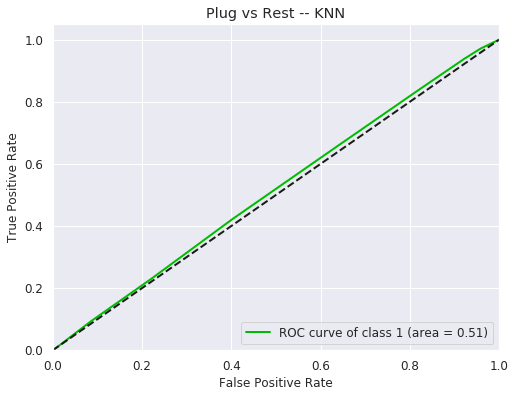

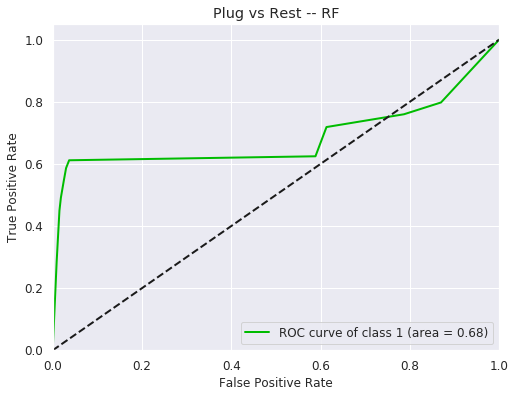

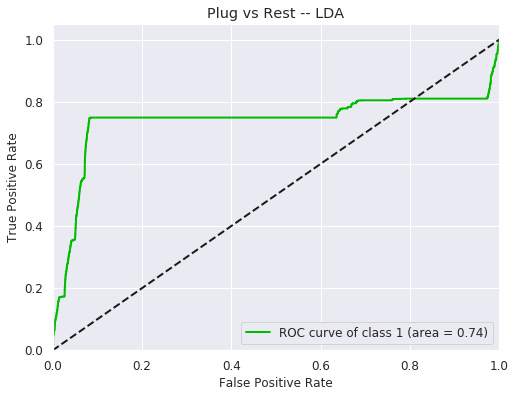

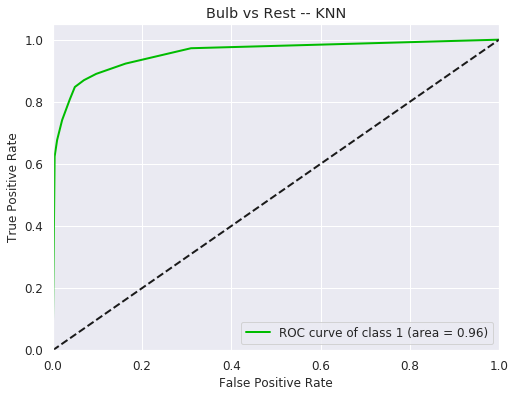

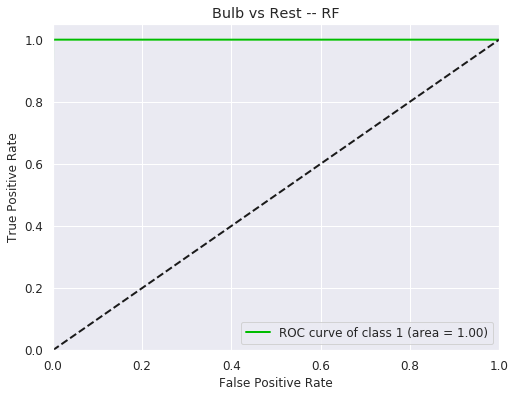

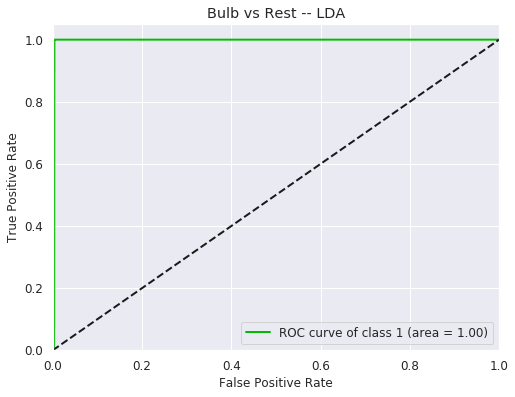

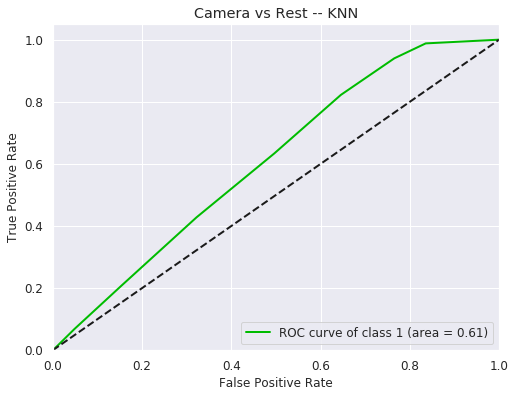

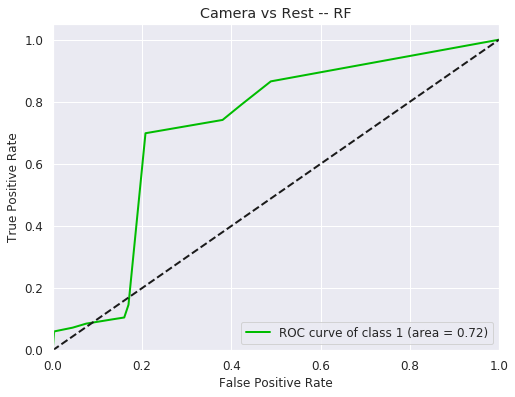

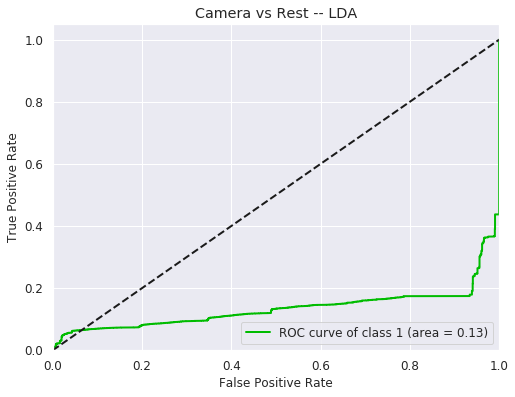

In [24]:
# Plotting ROC curves
sns.set(font_scale=1)

# Extract devices and classifiers
dev_pairs = all_under_devtype[0].keys()
classifiers = all_under_devtype[0][dev_pairs[0]].keys()

for device in dev_pairs:
    for classifier in classifiers:
        # Extract predicted probas and y_true
        pred_proba = all_under_devtype[0][device][classifier]['Classifier']['Pred_Proba']
        true = all_under_devtype[0][device][classifier]['Classifier']['True']
        
        # Plot ROC curve
        fpr, tpr, threshold = roc_curve(true, pred_proba[:,1], pos_label=1)
        auc = roc_auc_score(true, pred_proba[:,1])
        title = str(device).capitalize() + " vs Rest -- " + str(classifier).upper() 
        skplt.metrics.plot_roc(true, pred_proba, title=title, plot_micro=False, plot_macro=False, 
                               classes_to_plot=[1], figsize=(8,6));

### Time Performance

In [25]:
print "Total time:", all_under_devtype[1], "seconds"

for device in device_types:
    for classifier in classifiers:
        title = "("+ str(device).capitalize() + ", "+str(classifier).upper() + ")"
        print title, ":", all_under_devtype[0][device][classifier]['Classifier']['Time'], "seconds"

Total time: 1.42961907387 seconds
(Bulb, KNN) : 0.224107027054 seconds
(Bulb, RF) : 0.0545279979706 seconds
(Bulb, LDA) : 0.00715899467468 seconds
(Camera, KNN) : 0.219429969788 seconds
(Camera, RF) : 0.0697388648987 seconds
(Camera, LDA) : 0.00782585144043 seconds
(Plug, KNN) : 0.219501018524 seconds
(Plug, RF) : 0.0579540729523 seconds
(Plug, LDA) : 0.00694608688354 seconds


### Feature Importance

In [26]:
feature_importances = pd.DataFrame(w.randomforest.feature_importances_,
                                   index = features_list,
                                    columns=['importance']).sort_values('importance',ascending=False)
display(feature_importances)

,importance
Belkin,0.469903
PacketLength,0.167232
Dropcam,0.128263
Assoc_Packets,0.075848
QoS_Null,0.051225
QoS_Data,0.044470
Time,0.034855
Data,0.021882
Tp-link,0.005111
Lifi,0.001212


### Sampling

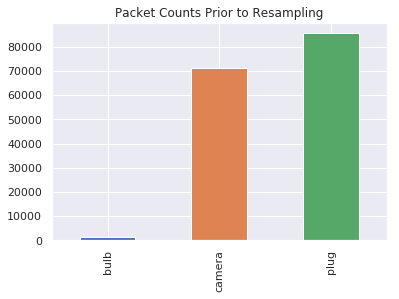

In [27]:
# Resample packets based on DeviceType
# Useful info used from https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#
devtype_df = df["DeviceType"].value_counts().sort_index()
devtype_df.plot(kind='bar', title="Packet Counts Prior to Resampling");

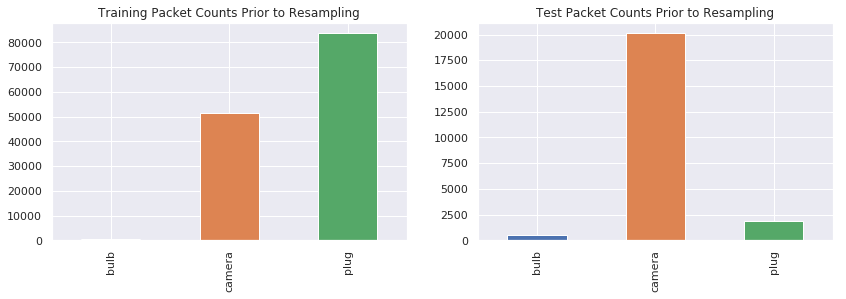

In [28]:
plt.subplots(1, 2, figsize=(14,4)) # number of rows, number of columns, figure size=(width, height)

# Plot training set
df_train = df[df["Set"]=="train"]
plt.subplot(1, 2, 1)
df_train["DeviceType"].value_counts().sort_index().plot(kind='bar', title="Training Packet Counts Prior to Resampling");

# Plot test set
df_test = df[df["Set"]=="test"]
plt.subplot(1, 2, 2)
df_test["DeviceType"].value_counts().sort_index().plot(kind='bar', title="Test Packet Counts Prior to Resampling");


In [29]:
# # Plot post-sampling
# plt.subplots(1, 2, figsize=(14,4)) # number of rows, number of columns, figure size=(width, height)

# # Plot training set
# df_train_downsampled['DeviceType'] = df_train_downsampled[['bulb','camera','plug']].idxmax(1)
# plt.subplot(1, 2, 1)
# df_train_downsampled['DeviceType'].value_counts().sort_index().plot(kind='bar', title="Training Packet Counts After Resampling");

# # Plot test set
# df_test = df[df["Set"]=="test"]
# plt.subplot(1, 2, 2)
# df_test["DeviceType"].value_counts().sort_index().plot(kind='bar', title="Test Packet Counts After Resampling");
